# Titanic Tutorial by YouhanLee - 1st Try

타이타닉 데이터셋은 타이타닉에 승선한 사람들의 신상 정보를 활요하여 승성한 사람들의 생존 여부를 예측하는 모델을 생성하는 것이 목적이다.

`matplotlib` `seaborn` `plotly` `pandas` `numpy` `sklearn`

* **데이터셋 확인** : null data 존재 여부 확인
* **EDA** : 여러 피처들의 개별 분석 및 피처들 간의 상관관계를 확인. 이 때 시각화 툴을 사용
* **Feature Engineering** : 모델의 성능을 높이기 위해 피처들을 전처리하는 과정.    
  * *one-hot-encoding*, *class 분류*, *문자열 데이터 처리* 등이 여기서 이루어짐.
* **Model 설계** : `sklearn`, `pytorch`, `tensorflow` 등을 사용하여 모델 설계.
* **Model 학습 및 예측** : train 데이터를 가지고 모델을 학습시키고 test 데이터로 예측.
* **Model 평가** : 예측된 데이터를 보고 모델의 성능을 판단.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn setting
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# msno library
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. 데이터셋 확인

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


우리가 다루고자 하는 피처는 `Pclass`, `Age`, `SibSp`, `Parch`. `Fare` 등이 있고, 예측하려는 target 피처는 `Survived`이다.
* `Pclass` : 티켓의 클래스 (이코노미, 퍼스트 같은 것)
* `SibSp` : 함께 탑승한 형제와 배우자의 수
* `Parch` : 함께 탑승한 부모와 아이의 수
* `Embarked` : 탑승한 항구
* `Cabin` : 객실 번호

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


`describe()`를 통해 각 피처에 대한 통계치를 알 수 있다. **PassengerId**의 개수는 819개이므로, 만약 모든 피처가 데이터를 갖고 있다면 똑같이 819개여야 한다. 하지만, **Age**를 보면 714개로 결측치(missing value)가 있는 것을 알 수 있다.

### 1.1. Null 데이터 확인

In [6]:
# train 데이터에 대하여 각 피처마다 null data의 비율을 구함
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
# test 데이터에 대하여 각 피처마다 null data의 비율을 구함
for col in df_test.columns:
    # 각 피처마다 null data의 비율을 구함
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


train과 test에서 둘 다 `Age`, `Cabin`, `Embarked`에서 null 데이터가 있는 것을 알 수 있다. **MSNO** 라이브러리로 각 피처에 대해 null 데이터를 시각화하면 다음과 같다.     

* **matrix**에서 흰색 부분이 결측치라는 뜻이고, 옆에 있는 것은 스파크라인(sparkline)으로 각 행의 데이터 완성도를 나타낸다.
* **bar**는 각 열의 누락된 데이터가 얼마나 존재하는지를 나타낸다.

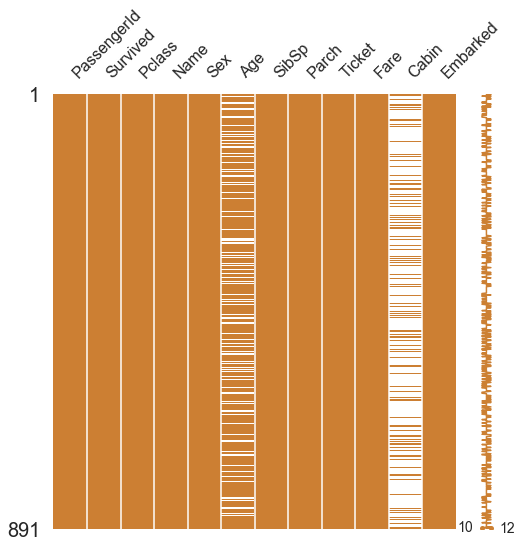

In [13]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

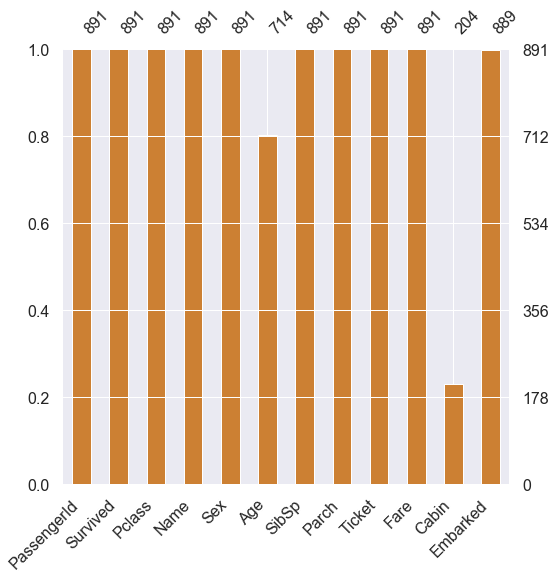

In [15]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

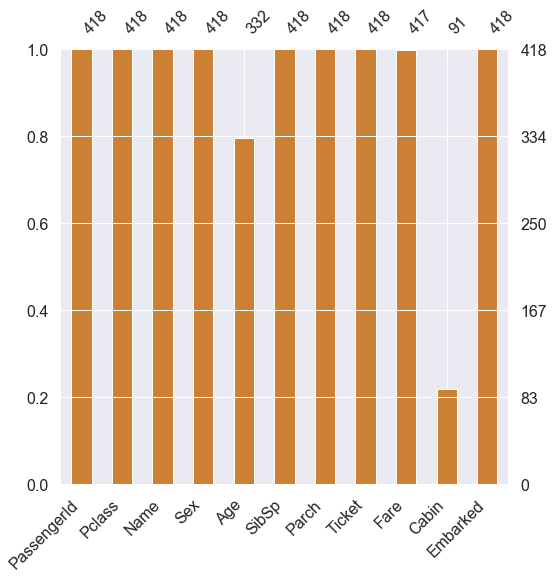

In [16]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1.2. Target Label 확인

Target Label이 어떤 분포(distribution)을 가지고 있는지 확인을 해야 한다. 즉, 클래스 별 여기서는 1과 0의 분포에 따라서 모델의 평가 방법이 달라질 수 있다.

여기서 쓴 `subplots`는 한 figure에 여러 개의 plot을 그리고 싶을 때 사용한다.

> **subplots(self, nrows=1, ncols=1, *)**
> - nrows : 행의 개수
> - ncols : 열의 개수
> - figsize : figure의 사이즈

`pie`는 pie 차트를 그릴 수 있는 함수이다.

> **pie(self, x, explode=None, autopct=None, shadow=False, *)**
> - explode : pie 조각이 돌출되는 크기. 여기서는 2반쩨 파이만 돌출.
> - autopct : pie 조각의 전체 대비 백분율. 소수점 첫째자리까지 표현.
> - ax : 대상 axe 객체
> - shadow : 그림자 효과 여부

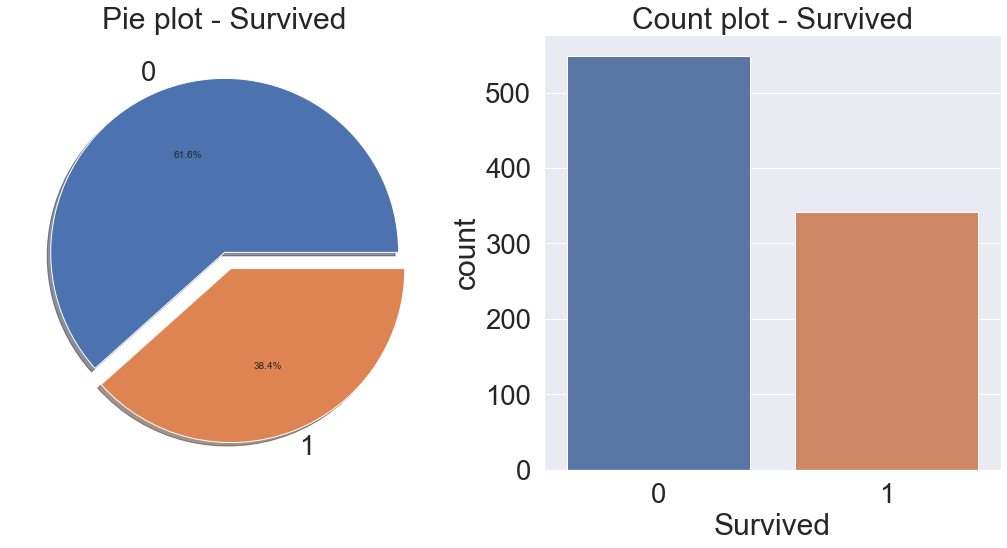

In [21]:
# 시각화를 위한 axe 객체 생성
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 1. Survived 피처만 된 Series를 추출
# 2. 각 value별 data의 개수를 구하여 Series로 반환
# 3. 그것을 pie 차트로 나타냄
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# Survived에 각 value별 데이터가 얼마나 있는지 표시
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

시각화된 것을 보면 약 **38.4%**만 살아남은 것을 볼 수 있다. 또한 target value가 한 쪽으로 쏠려있지 않고 꽤 균일하게(balanced) 되어 있는 것을 알 수 있다.

그럼 균일하지 않은게 왜 문제일까? 만약 100 중에 1이 99개, 0이 1개라고 하면, 모델을 어떤 input이 들어오든 1로 예측을 하게 되면 정확도는 99%가 나온다. 그래서 이럴 경우 다른 방법을 쓰거나 평가지표를 바꾸어야 한다.

## 2. Exploratory Data Analysis (EDA)

각 피처에 해당하는 본격적인 데이터 분석 단계. 시각화 라이브러리인 `matplotlib`, `seaborn`, `plotly` 등을 사용하여 분석한다.

> `💡 TIPS`   
> 특정 목적에 맞는 소스코드를 정리해두면 나중에 참고용으로 편하다!

### 2.1. Pclass

`Pclass`는 **카테고리이면서, 순서가 있는** 서수형(ordinal) 데이터이다. 이제 `Pclass`와 target인 `Survived`와의 관계를 살펴보자.
1. Pclass와 Survived를 가져와 `groupby`를 사용하여 Pclass를 기준으로 묶는다.
2. 그러면 Pclass마다 0과 1이 count가 되면서 각 Pclass 별로 생존자를 알 수 있다.

여기서 `groupby` 함수를 잠시 살펴보자. `groupby`는 데이터를 그룹 별로 분류할 때 사용한다. 여기서는 Pclass의 value를 기준으로 다른 피처 그룹 별로 분류를 한다. 그 후, GroupBy 객체 뒤에 `sum`, `mean`, `min` 등과  같은 그룹 연산 메서드를 붙여서 그룹 별로 연산을 가능하게 한다.
> **DataFrame.groupby(by=None, as_index=True)**
> * `by` : 어떤 그룹을 기준으로 할 것인지
> * `as_index` : 기준 그룹의 value를 인덱스로 지정할 것인지

In [19]:
# 생존 사망과 상관없이 각 클래스별 몇 명이 있는지
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [20]:
# 생존자는 몇 명인지
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


이 때 pandas의 **crosstab**을 사용하면 위의 과정을 조금 더 수월하게 확인할 수 있다.

> **pandas.crosstab(index, columns, margins=False)**
> - index : row에서 그룹핑을 할 Series
> - columns : column에서 그룹핑을 할 Series
> - margins : 각 row와 column의 합을 나타낼건지 (subtotal)

참고로 pandas의 styling과 관련해서는 [여기](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)를 참고하세요!

In [22]:
pd.crosstab(df_train['Pclass'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


 각 클래스별로 `mean()` 메서드를 붙여주면 각 클래스별 생존류을 얻을 수 있다. class 1의 경우 생존률은 약 **0.63**이 되는 걸 알 수 있다. 즉, **Pclass가 좋을 수록 생존률이 높다.**
 
 > **DataFrame.sort_values(by, ascending=True)**
 > - `by` : 정렬 기준
 > - `ascending` : 정렬 순서 (높아지는 순 or 낮아지는 순)

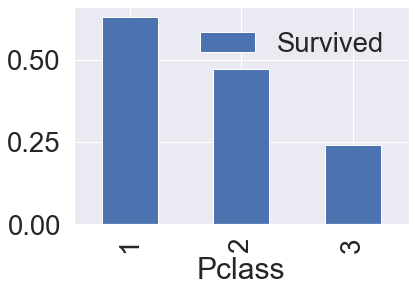

In [24]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar()

seaborn의 countplot으로 좀 더 보기 쉽게 그래프를 그려보자. 다음은 특정 label에 따른 개수를 나타낸 것이다. Pclass 1, 2, 3 순으로 **63%, 48%, 25%**로 Pclass가 생존률에 큰 영향을 미친다고 판단할 수 있다.

> `💡 TIP`    
> pandas에서는 Series나 Dataframe을 plot할 수 있게 해놓았다. 백엔드를 쓴다나? 약간 tensorflow에서 keras가 돌아가는 요런 느낌인 것 같은데.. 정확하지는 않다. 어쨌든, 기본적으로 matplotlib를 사용한다.

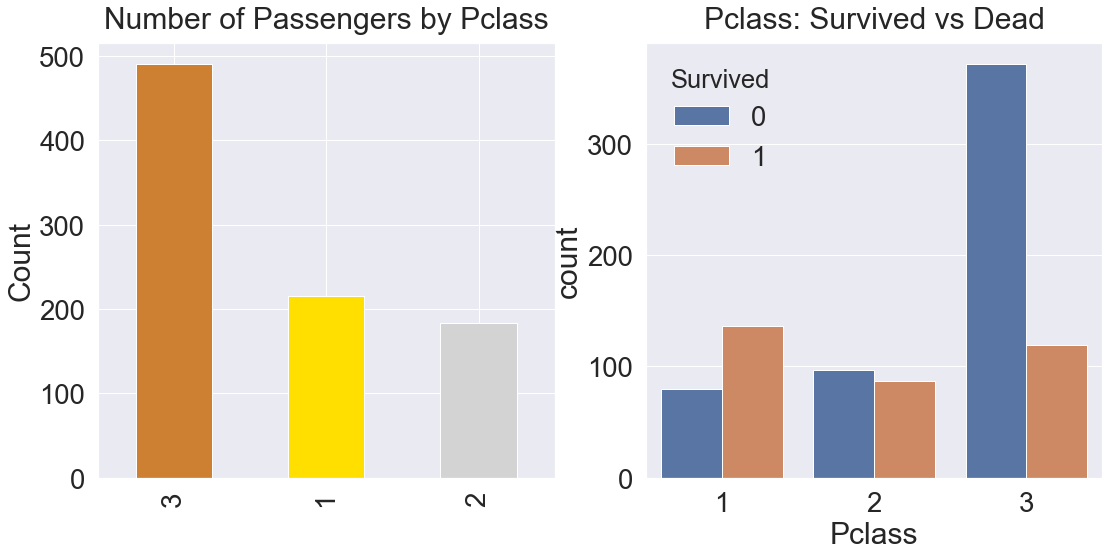

In [25]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 각 클래스별 오직 생존자 수만
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')

# 각 클래스별 생존자/사망자 수
# hue는 각 클래스를 뭘로 구분할건지. 여기서는 생존자/사망자가 됨.
# 약간 조건부 확률처럼 받아들이면 됨. 예를 들어 class가 1일 때의 생존자/사망자수
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

### 2.2. Sex

이번에는 성별로 생존률이 어떻게 달라는지 확인해보자. Pclass와 마찬가지로 **groupby**와 **seaborn의 countplot**을 가지고 시각화해보면 다음과 같다.

이 때 **여자가 생존률이 더 높음**을 알 수 있다.

In [31]:
# 각 성별 생존률
df_train[['Sex', 'Survived']].groupby(
    ['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [32]:
# crosstab으로 나타낸 각 성별 생존자와 사망자
pd.crosstab(df_train['Sex'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


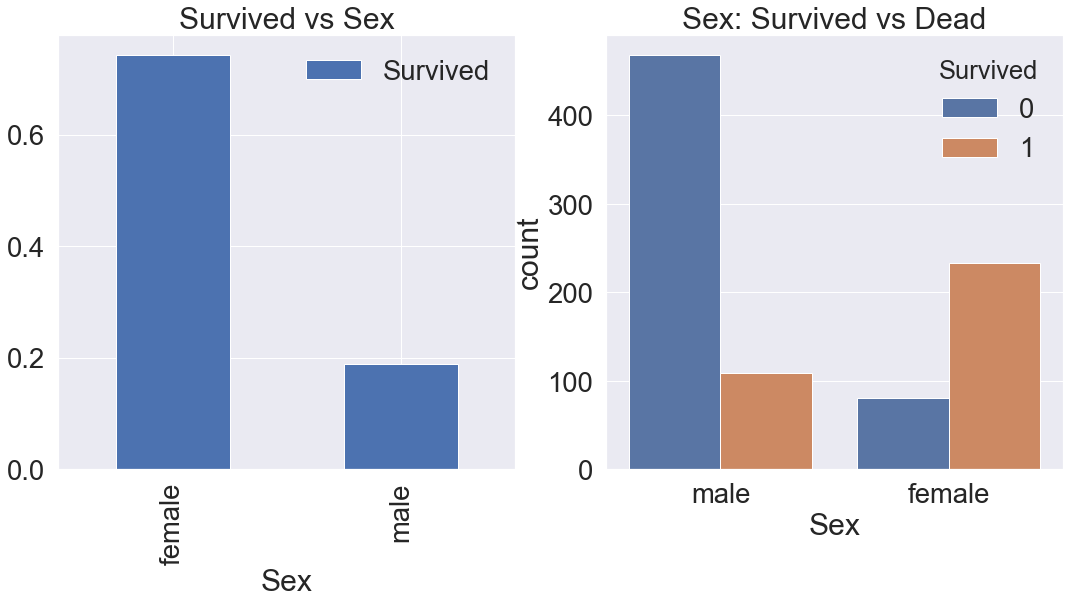

In [29]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 각 성별 생존자 수
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# 각 성별 생존자/사망자 수
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

### 2.3. Both Sex and Pclass

이번에는 **Sex와 Pclass 두가지에 관해서 생존이 어떻게 달라지는지** 확인해보자. 이 때 seaborn의 `factorplot`을 이용하면 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수가 있다. `y`의 평균값을 나타내는데, `hue`로 지정된 피처의 종류수만큼 선이 그려진다. 여기서는 Sex인데 Sex는 남과 여 두가지이므로 선이 2개가 그려진다.

> **seaborn.factorplot(x=None, y=None, hue=None, data=None, height=5, aspect=1)**
> - `x`, `y` : x축, y축으로 나타낼 피처들
> - `hue` : 선으로 그릴 피처 (카테고리형 피처)
> - `col` : 각 value를 column으로 나눌 피처 (카테고리형 피처)
> - `data` : plot할 데이터셋(dataframe)
> - `height` : figure의 사이즈. 예전에는 `size` 였음.
> - `aspect` : figure의 가로세로 비율

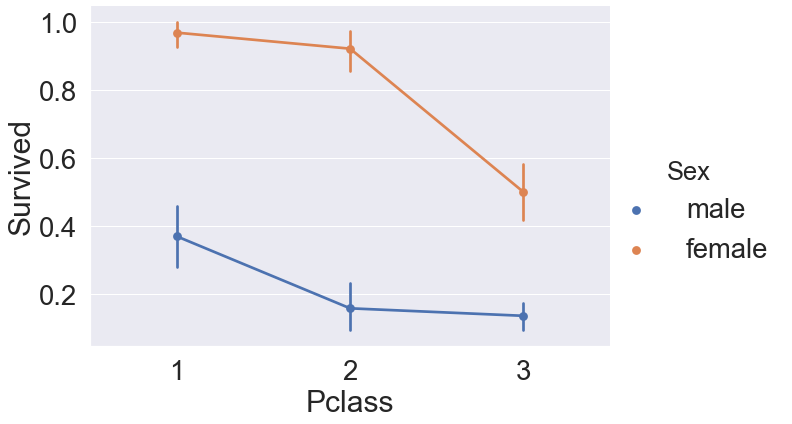

In [37]:
sns.factorplot('Pclass', 'Survived', hue='Sex',
               data=df_train, size=6, aspect=1.5)

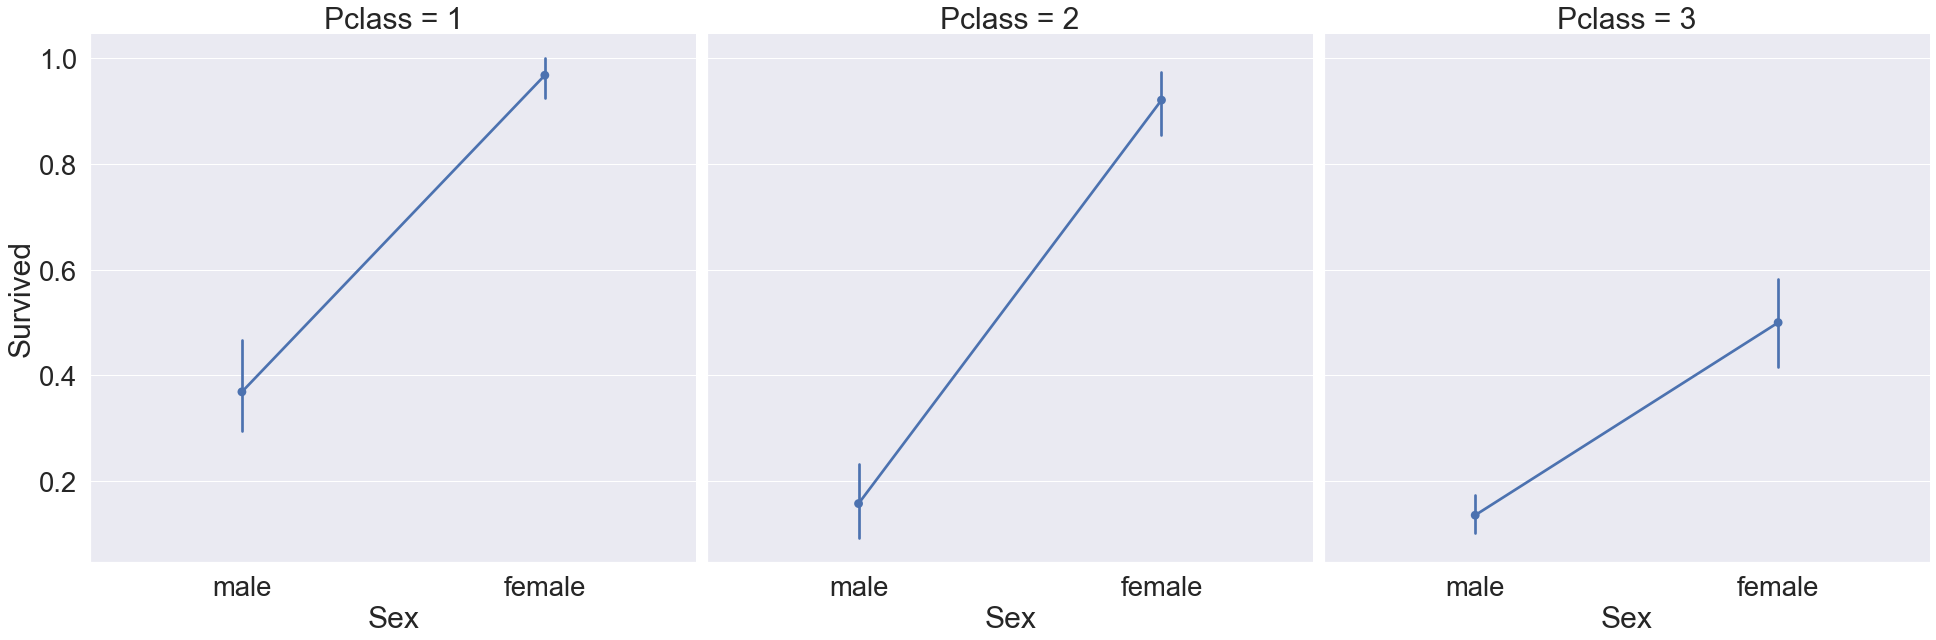

In [38]:
# saturation은 HSL 컬러의 S(채도)부분을 말함
sns.factorplot(x='Sex', y='Survived', col='Pclass',
               data=df_train, saturation=0.5, size=9, aspect=1)

### 2.4. Age

## References
- [HONG_YP : missingno를 이용하여 결측치를 시각화해보기](https://hong-yp-ml-records.tistory.com/14)    
- [데이터사이언스스쿨 : 누락데이터 처리](https://datascienceschool.net/view-notebook/8cbbdd4daaf84c0492d440b9a819c8be/)   
- [데이터사이언스스쿨 : Seaborn을 사용한 데이터 분포 시각화](https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/)    
- [데이터사이언스스쿨 : 시각화 패키지 Matplotlib 소개](https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/)   
- [데이터사이언스스쿨 : 데이터프레임의 데이터 조작](https://datascienceschool.net/view-notebook/aa62265f02fc429aa636ef343c3b1fda/)  
- [Matplotlib Tutorial : Pie Chart](https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.html)
- [옥수별 : 파이 차트 그리기](https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220755238265&proxyReferer=https:%2F%2Fwww.google.com%2F)